### The dataset present marketshare, volumne sale of major vodka brand in US. The goal is to find the impact of different marketing mix to total sale,the data dictionary is 

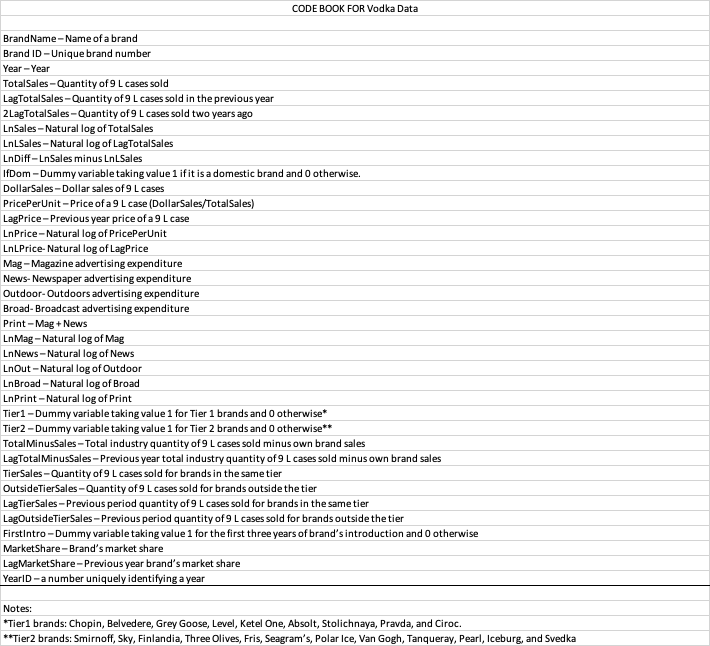



In [198]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import linregress, pearsonr
from scipy import stats
import audit_function as adx

import statsmodels.formula.api as smf

In [200]:
df = pd.read_excel('M-0803X.xlsx', sheet_name = 'data')


/Applications/anaconda/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


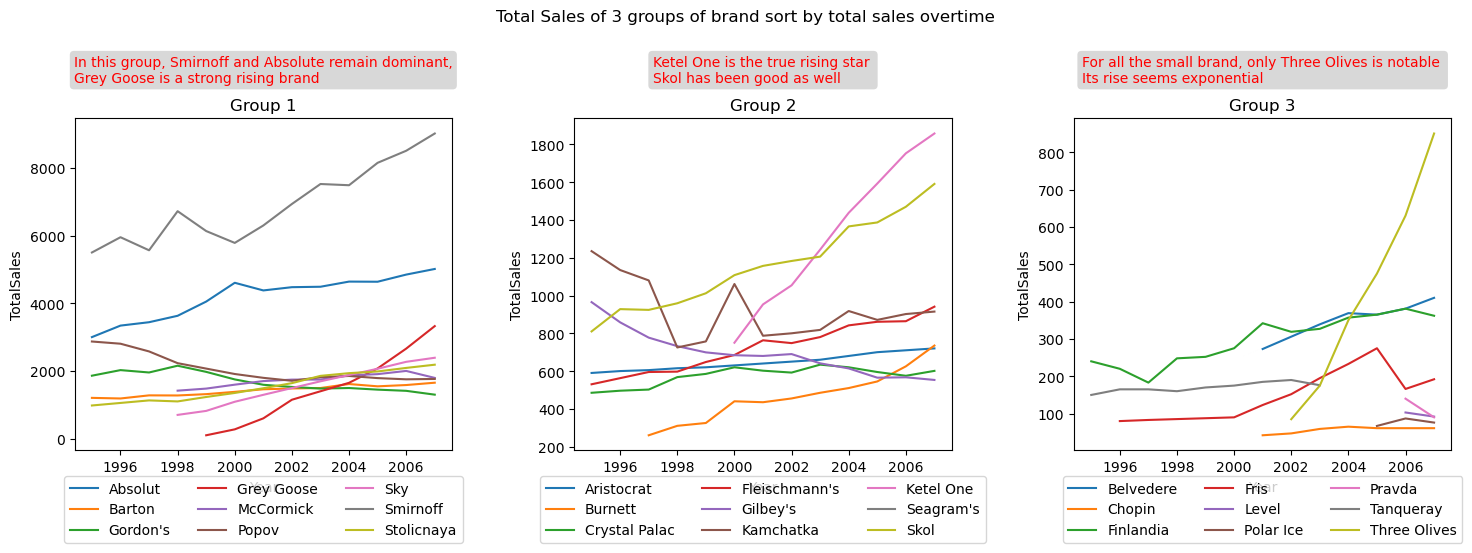

In [3]:
x =  df.groupby('BrandName')['TotalSales'].mean()
x = x.reset_index()
x = x.sort_values('TotalSales', ascending = False)
space = len(x)//3
al_list = [ x[i*space:(i+1)*space]['BrandName'] if i <=1 else x[i*space:]['BrandName'] for i in range(3) ]


fig, axes = plt.subplots(1,3, figsize = (15,6))

for i,(ax, ran) in  enumerate(zip(axes,al_list)):
    sns.lineplot(data = df[df['BrandName'].isin(ran)] , y= 'TotalSales', x=  'Year', hue = 'BrandName', ax = ax)
    ax.legend(loc='lower center', ncol=3, bbox_to_anchor = (0.5,-0.3))
    ax.set_title(f'Group {i+1}')
plt.suptitle('Total Sales of 3 groups of brand sort by total sales overtime')

comment_1 = ('In this group, Smirnoff and Absolute remain dominant,\n'
             'Grey Goose is a strong rising brand'
            )

axes[0].text(0.5,1.1,comment_1,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10, multialignment='left', transform =  axes[0].transAxes
)

comment_2 = ('Ketel One is the true rising star \n'
             'Skol has been good as well ' 
            )

axes[1].text(0.5,1.1,comment_2,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10, multialignment='left', transform =  axes[1].transAxes
)

comment_3 = ('For all the small brand, only Three Olives is notable \n'
             'Its rise seems exponential'
            )

axes[2].text(0.5,1.1,comment_3,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10, multialignment='left', transform =  axes[2].transAxes
)


plt.tight_layout()
plt.show()

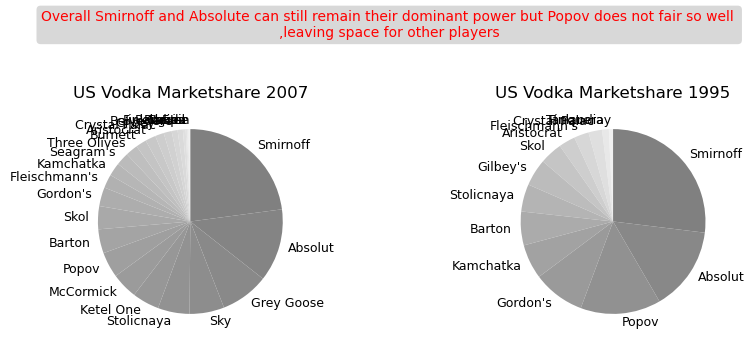

In [48]:
sizes_2007 = df[df['Year'] == 2007 ][['Marketshare', 'BrandName']].sort_values('Marketshare', ascending = True)
sizes_1995 = df[df['Year'] == 1995 ][['Marketshare', 'BrandName']].sort_values('Marketshare', ascending = True)
fig, axes = plt.subplots(1,2 , figsize = (10,3))
colors_2007 = sns.light_palette("grey", n_colors=len(sizes_2007))
colors_1995 = sns.light_palette("grey", n_colors=len(sizes_1995))
axes[0].pie(sizes_2007['Marketshare'], startangle=90, labels = sizes_2007['BrandName'], colors =  colors_2007 ,textprops={'fontsize': 9})
axes[1].pie(sizes_1995['Marketshare'], startangle=90, labels = sizes_1995['BrandName'], colors =  colors_1995 ,textprops={'fontsize': 9})
axes[0].set_title('US Vodka Marketshare 2007')
axes[1].set_title('US Vodka Marketshare 1995')

comment = ('Overall Smirnoff and Absolute can still remain their dominant power but Popov does not fair so well \n'
            ',leaving space for other players')
fig.text(0.5,1.1,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10)

plt.show()

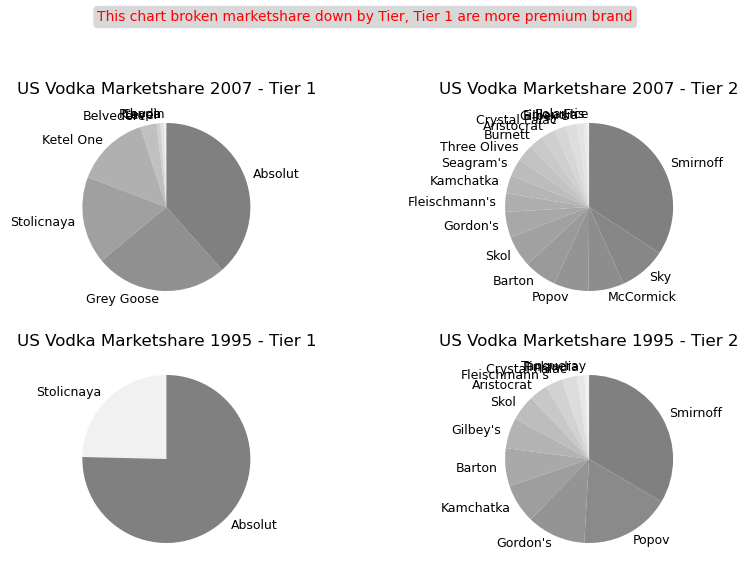

In [56]:
sizes_2007_1 = df[(df['Year'] == 2007) &(df['Tier1'] == 1 ) ][['Marketshare', 'BrandName']].sort_values('Marketshare', ascending = True)
sizes_2007_2 = df[(df['Year'] == 2007) &(df['Tier1'] == 0 ) ][['Marketshare', 'BrandName']].sort_values('Marketshare', ascending = True)
sizes_1995_1 = df[(df['Year'] == 1995) &(df['Tier1'] == 1 ) ][['Marketshare', 'BrandName']].sort_values('Marketshare', ascending = True)
sizes_1995_2 = df[(df['Year'] == 1995) &(df['Tier1'] == 0 ) ][['Marketshare', 'BrandName']].sort_values('Marketshare', ascending = True)

fig, axes = plt.subplots(2,2 , figsize = (10,6))
colors_2007_1 = sns.light_palette("grey", n_colors=len(sizes_2007_1))
colors_1995_1 = sns.light_palette("grey", n_colors=len(sizes_1995_1))
colors_2007_2 = sns.light_palette("grey", n_colors=len(sizes_2007_2))
colors_1995_2 = sns.light_palette("grey", n_colors=len(sizes_1995_2))

axes[0,0].pie(sizes_2007_1['Marketshare'], startangle=90, labels = sizes_2007_1['BrandName'], colors =  colors_2007_1 ,textprops={'fontsize': 9})
axes[0,1].pie(sizes_2007_2['Marketshare'], startangle=90, labels = sizes_2007_2['BrandName'], colors =  colors_2007_2 ,textprops={'fontsize': 9})
axes[1,0].pie(sizes_1995_1['Marketshare'], startangle=90, labels = sizes_1995_1['BrandName'], colors =  colors_1995_1 ,textprops={'fontsize': 9})
axes[1,1].pie(sizes_1995_2['Marketshare'], startangle=90, labels = sizes_1995_2['BrandName'], colors =  colors_1995_2 ,textprops={'fontsize': 9})

axes[0,0].set_title('US Vodka Marketshare 2007 - Tier 1')
axes[1,0].set_title('US Vodka Marketshare 1995 - Tier 1')
axes[0,1].set_title('US Vodka Marketshare 2007 - Tier 2')
axes[1,1].set_title('US Vodka Marketshare 1995 - Tier 2')

comment = ('This chart broken marketshare down by Tier, Tier 1 are more premium brand')
fig.text(0.5,1.01,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10)

plt.show()

### Lets examine the impact of some of the factor on sales:
### + Price 
### + Quality (Tier 1 or Tier 2) 
### + Competition (total sales of competitor, or we could use some sort of market concentration index e.g. Herfindahl-Hirschman Index )
### + Marketing mix (expenditure on different marketing medium)


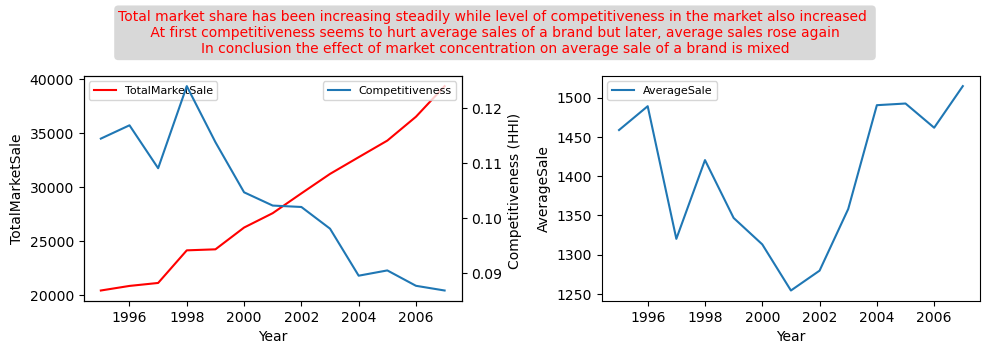

In [201]:
###add HHI for market competition
df['HHI_Total'] = df.groupby('Year')['Marketshare'].transform(lambda x: (x**2).sum())
#df['HHI Within Tier'] = df.groupby('Year')['TierSales','TotalSales'].transform(lambda x: (x**2).sum())

#plot to see the effect of market concentration index HHI
fig, axes = plt.subplots(1,2, figsize = (10,3) )

# Create a secondary axis sharing the same x-axis
ax2 = axes[0].twinx()

# Plot TotalSales on the primary y-axis
sns.lineplot(data=df_grouped, x='Year', y='TotalMarketSale', ax=axes[0], color = 'red', label='TotalMarketSale')

# Plot Marketshare on the secondary y-axis
sns.lineplot(data=df_grouped, x='Year', y='Competitiveness', ax=ax2, label='Competitiveness')

sns.lineplot(data=df_grouped, x='Year', y='AverageSale', ax=axes[1], label='AverageSale')

# Set axis labels
axes[0].set_ylabel('TotalMarketSale')
ax2.set_ylabel('Competitiveness (HHI) ')
axes[0].set_xlabel('Year')

comment = ('Total market share has been increasing steadily while level of competitiveness in the market also increased \n '
          'At first competitiveness seems to hurt average sales of a brand but later, average sales rose again \n'
           'In conclusion the effect of market concentration on average sale of a brand is mixed'
          )
fig.text(0.5,1.01,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10)

axes[0].legend(fontsize = 8)
ax2.legend(fontsize = 8)
axes[1].legend(fontsize = 8)

plt.tight_layout()
plt.show()


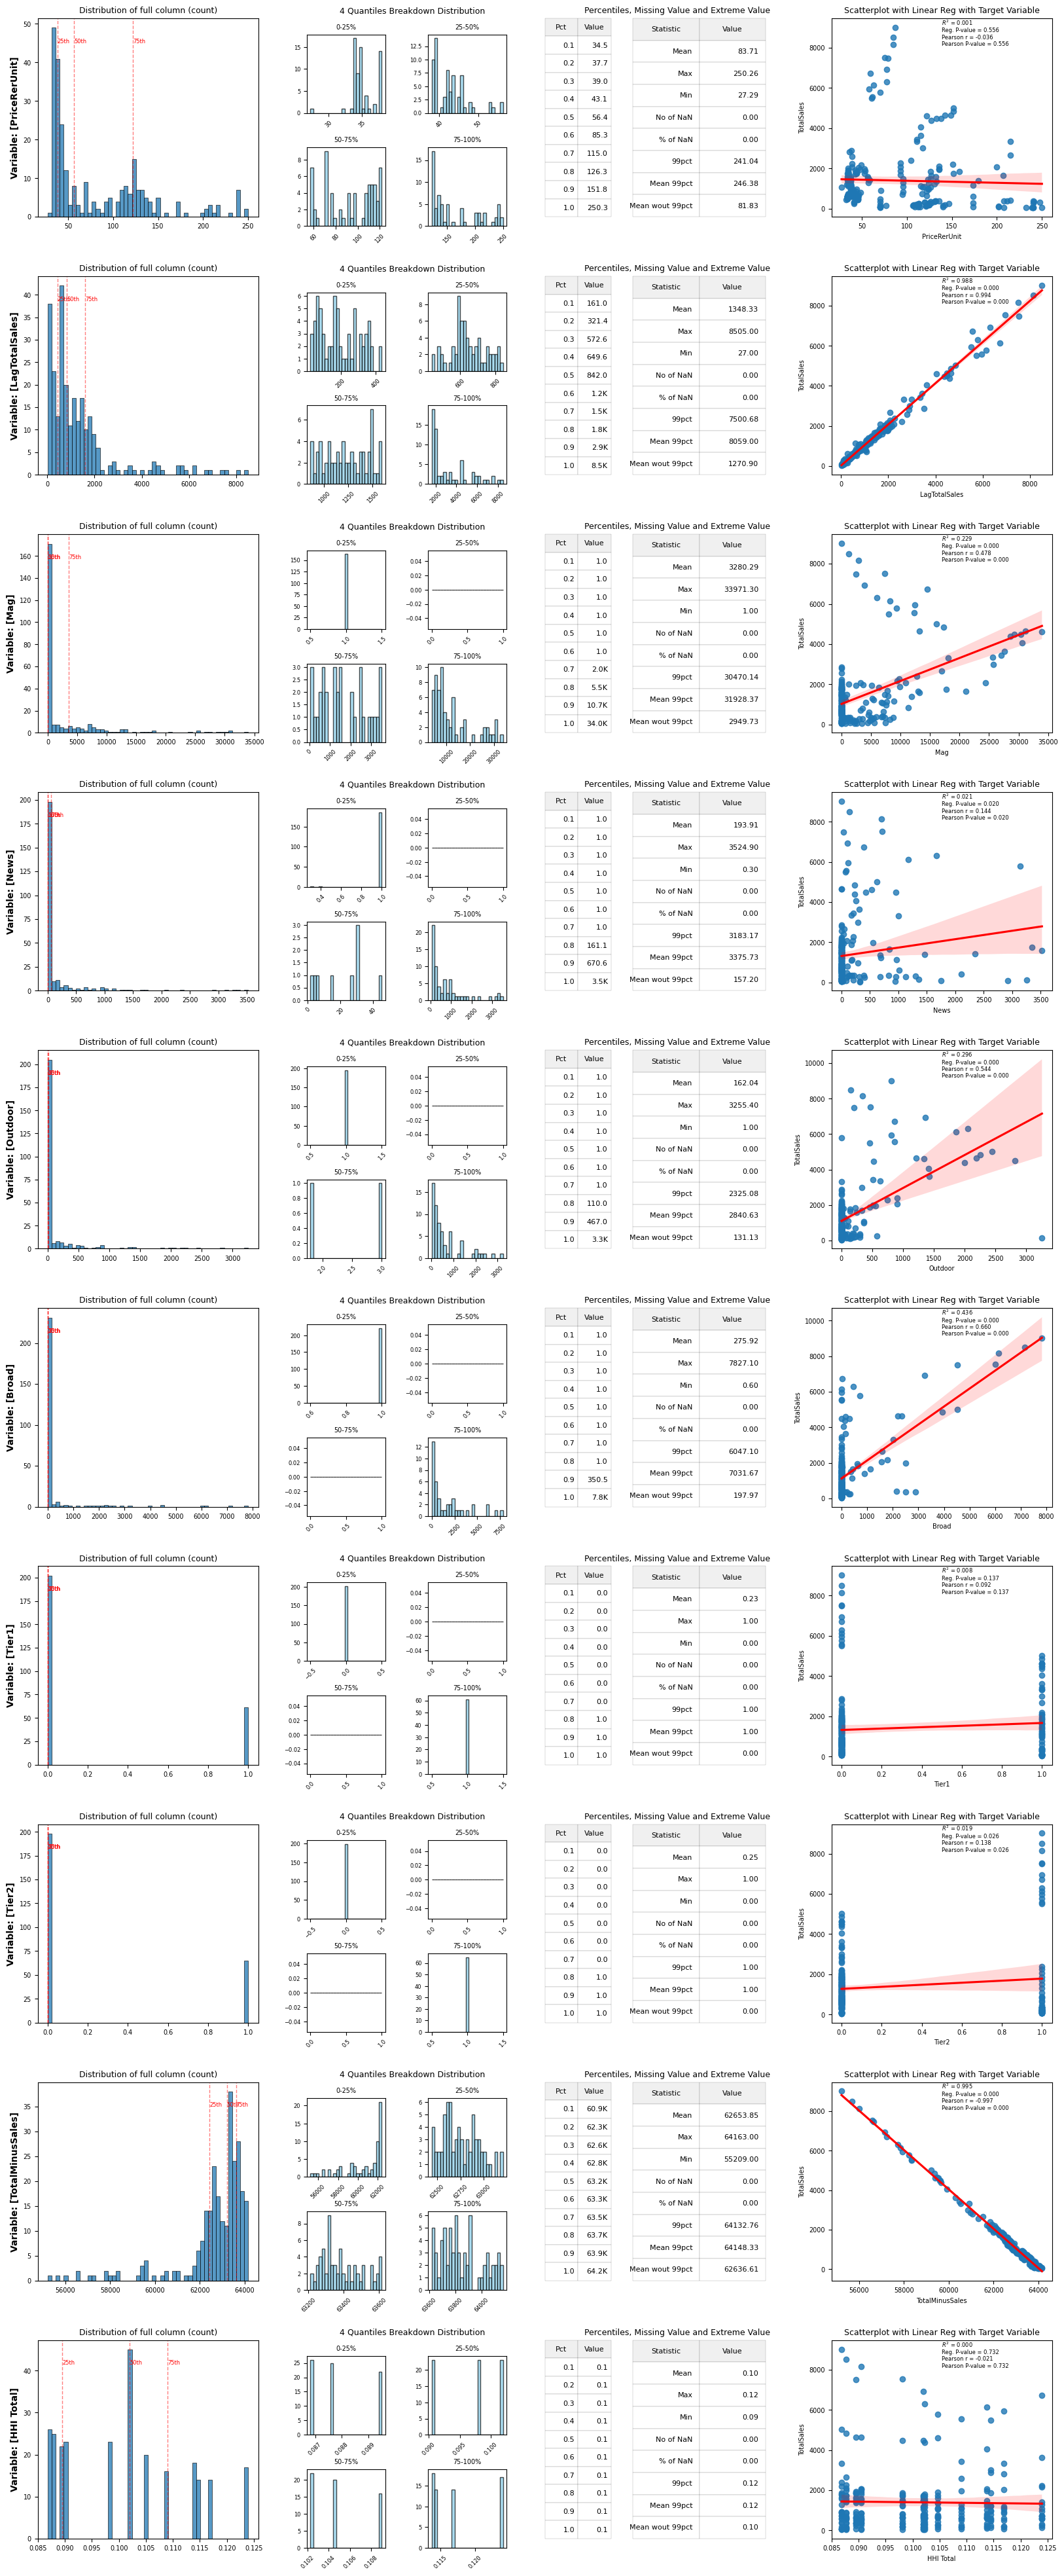

In [101]:
#Using my own magical data audit function
col_list = ['TotalSales','PriceRerUnit','LagTotalSales', 'Mag', 'News', 'Outdoor', 'Broad','Tier1', 'Tier2',
       'TotalMinusSales','HHI Total']
ad.data_audit_cont(df[col_list], 'TotalSales')

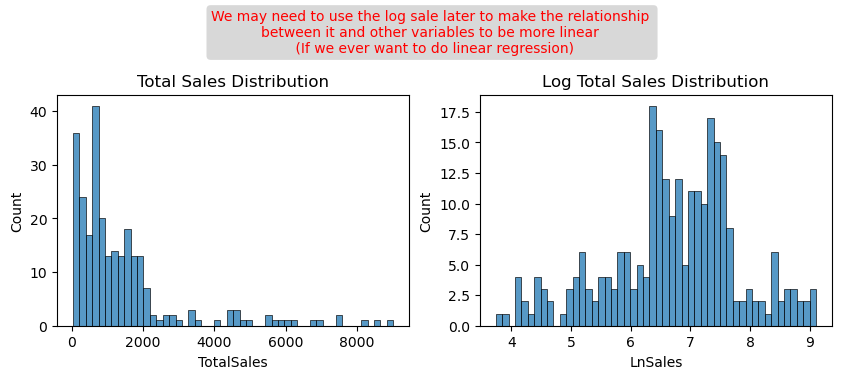

In [72]:
fig, axes = plt.subplots(1,2, figsize = (10,3))
sns.histplot(data = df, x = 'TotalSales' ,bins = 50, ax = axes[0])
sns.histplot(data = df, x = 'LnSales' ,bins = 50, ax = axes[1])
axes[0].set_title('Total Sales Distribution')
axes[1].set_title('Log Total Sales Distribution')
comment = ('We may need to use the log sale later to make the relationship \n'
            'between it and other variables to be more linear \n '
             '(If we ever want to do linear regression)')
fig.text(0.5,1.01,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10)
plt.show()

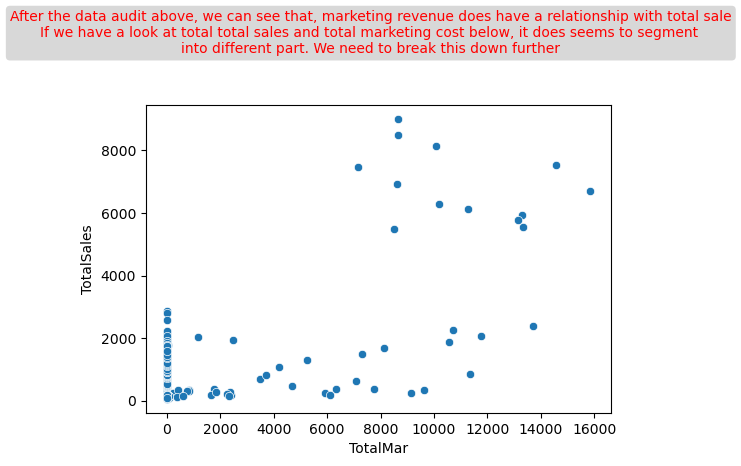

In [202]:
df['TotalMar'] = df['Mag']  + df['News'] + df['Outdoor'] + df['Broad']  
plt.figure(figsize = (6,4) )
sns.scatterplot(x = 'TotalMar', y = 'TotalSales', data = df[ df['Tier1'] == 0] )
comment = ('After the data audit above, we can see that, marketing revenue does have a relationship with total sale\n'
        'If we have a look at total total sales and total marketing cost below, it does seems to segment \n'
        'into different part. We need to break this down further' )
plt.text(0.5,1.001,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10, transform = plt.gcf().transFigure )

plt.show()

Text(0.5, 1.001, 'If we break things down by Tier, Tier1 which is more premium brands does have clear \nlinear relationship, while lower Tier seems to be more complicated')

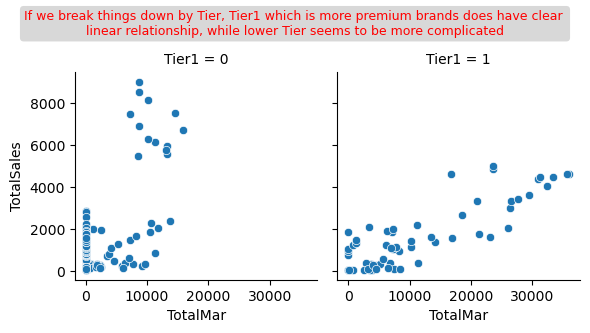

In [136]:
g =  sns.FacetGrid(df,  col = 'Tier1' )
g.map(sns.scatterplot, 'TotalMar', 'TotalSales' )

comment = ('If we break things down by Tier, Tier1 which is more premium brands does have clear \n'
          'linear relationship, while lower Tier seems to be more complicated')
plt.text(0.5,1.001,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 9, transform = plt.gcf().transFigure )


Text(0.5, 1.001, 'If breaking down by brand of lower Tier, we now understand what is going on \n, some brand have so tiny marketing buget that the data just label it 4mil, \nthis I guess could mean they are smaller or equal to 4 mil. Some brand clearly \nshow linear relationship: Sky,Three Olives, Fris. Smirnoff marketing butget does \nnot seems to have any relationship with total sales')

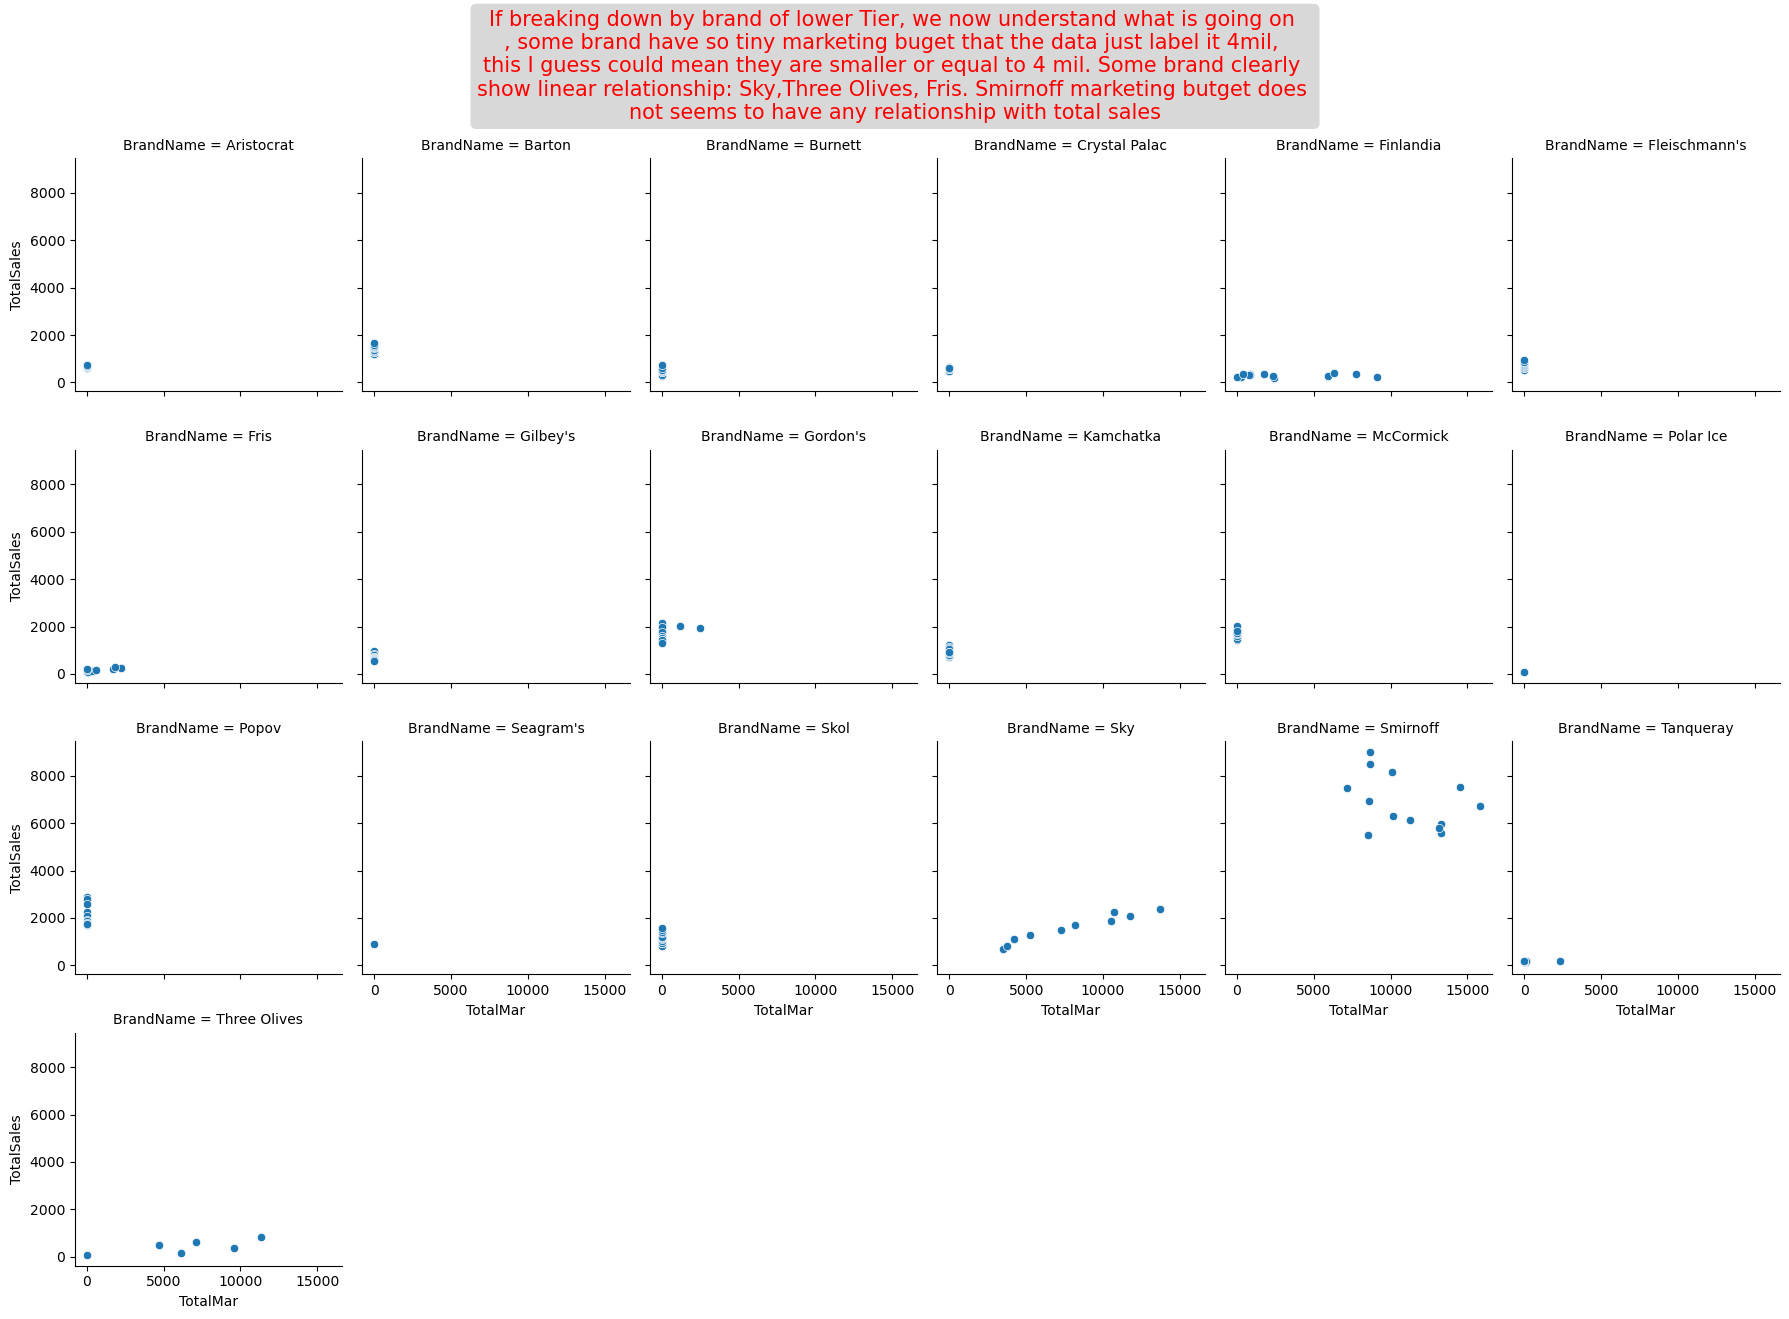

In [142]:
g =  sns.FacetGrid( df[df['Tier1'] == 0] , col = 'BrandName', col_wrap=6 )
g.map(sns.scatterplot, 'TotalMar', 'TotalSales' )
comment = ('If breaking down by brand of lower Tier, we now understand what is going on \n'
', some brand have so tiny marketing buget that the data just label it 4mil, \n'
'this I guess could mean they are smaller or equal to 4 mil. Some brand clearly \n'
'show linear relationship: Sky,Three Olives, Fris. Smirnoff marketing butget does \n'
'not seems to have any relationship with total sales')
plt.text(0.5,1.001,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 15, transform = plt.gcf().transFigure )


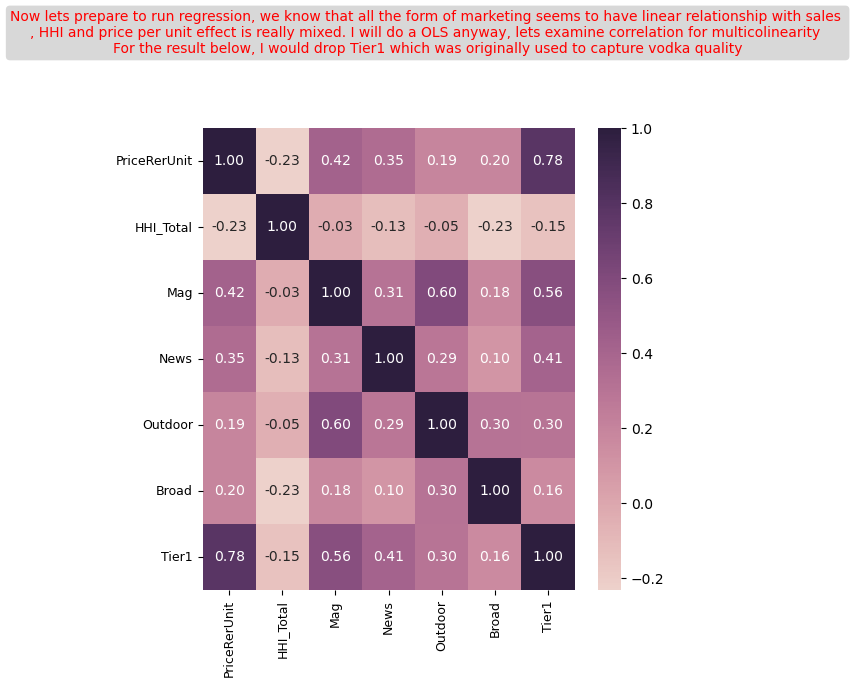

In [191]:
cor_matrix = df[['PriceRerUnit' ,'HHI_Total', 'Mag' , 'News' , 'Outdoor' , 'Broad' ,'Tier1']].corr()
plt.figure(figsize = (6,6))
sns.heatmap(cor_matrix ,annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f" )
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)
comment = ('Now lets prepare to run regression, we know that all the form of marketing seems to have linear relationship with sales \n'
            ', HHI and price per unit effect is really mixed. I will do a OLS anyway, lets examine correlation for multicolinearity. \n'
          'For the result below, I would drop Tier1 which was originally used to capture vodka quality'
          )
plt.text(0.5,1,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10, transform = plt.gcf().transFigure )

plt.show()

In [203]:
###I would not include observation with marketing butget < 4
model_formula = smf.ols('TotalSales ~ PriceRerUnit + (HHI_Total) + Mag + News + Outdoor + Broad ', data=df[ df['TotalMar'] > 4] ).fit()
print(model_formula.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSales   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     57.83
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.75e-30
Time:                        10:57:34   Log-Likelihood:                -906.74
No. Observations:                 108   AIC:                             1827.
Df Residuals:                     101   BIC:                             1846.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      132.2742   1276.629      0.104   

So the effect are:
- The effect of billboard ads was the most effective 
- Markeing in the news seems irrelevant
- Effect of price and market competitiness is pretty prominent (higher competition, lower sales)
  
However I was not 100% sure about the effect of HHI (competitiveness), it was barely statistically significant.\
I will do a ANOVA between two model to check if HHI is still relevant

In [204]:
import statsmodels.api as sm

# Fit the reduced model
model_reduced =  smf.ols('TotalSales ~ PriceRerUnit + Mag + News + Outdoor + Broad ', data=df[ df['TotalMar'] > 4] ).fit()

# Fit the full model 
model_full =  smf.ols('TotalSales ~ PriceRerUnit + (HHI_Total) + Mag + News + Outdoor + Broad ', data=df[ df['TotalMar'] > 4] ).fit()

# Compare the two models using ANOVA
anova_results = sm.stats.anova_lm(model_reduced, model_full)

print(anova_results)

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0     102.0  1.291997e+08      0.0           NaN       NaN       NaN
1     101.0  1.239916e+08      1.0  5.208089e+06  4.242362  0.041999


With this we can say that HHI is still relevant 

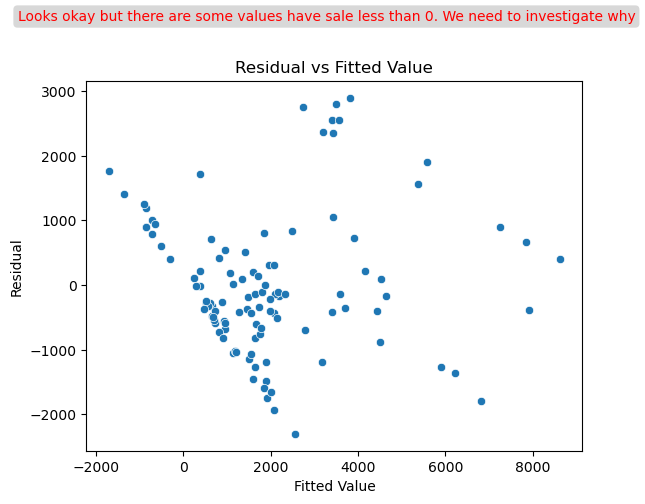

In [219]:
sns.scatterplot(x = model_full.fittedvalues , y = model_full.resid)
plt.title('Residual vs Fitted Value')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
comment = ('Looks okay but there are some values have sale less than 0. We need to investigate why'
          )
plt.text(0.5,1,comment,bbox=dict(facecolor='grey', alpha=0.3, boxstyle='round'
                                 ,edgecolor='none'),va = 'bottom'
                                , ha = 'center' , color = 'red', fontsize = 10, transform = plt.gcf().transFigure )

plt.show()

In [220]:
df_test = df[df['TotalMar'] > 4][['TotalSales' ,'PriceRerUnit', 'HHI_Total' ,'Mag', 'News' , 'Outdoor' , 'Broad']]

df_test['fitted_value'] =  model_full.fittedvalues

df_test.sort_values('fitted_value').head(20)

,TotalSales,PriceRerUnit,HHI_Total,Mag,News,Outdoor,Broad,fitted_value
63,61,250.2623,0.086823,1.0,27.3,1.0,1.0,-1702.454461
62,61,232.2459,0.087678,691.4,1.0,1.0,1.0,-1351.457693
42,369,240.8672,0.089514,6729.6,132.7,1.0,1.0,-890.401013
57,42,240.4762,0.102255,3456.8,324.5,1.0,1.0,-852.234401
41,339,241.3274,0.098057,5013.3,150.8,1.0,1.0,-850.791764
58,47,240.6808,0.101999,2567.5,946.6,1.0,1.0,-843.741786
61,61,207.4426,0.090472,2227.1,318.1,1.0,1.0,-725.681069
39,273,240.4762,0.102255,3498.1,1133.2,1.0,1.0,-724.350247
40,306,247.5490,0.101999,5439.7,1296.1,1.0,1.0,-642.477537
169,92,202.0000,0.086823,4431.1,1.0,140.8,1.0,-512.698242


## So the thing is these brand have extremely high price, The limitation of the model is predicting brand with extreme price